# Telcom Customer Churn Analysis - Supervised Learning Project

# GitHub
GitHub URL: https://github.com/xllcheryl/Supervised-Learning-Final-Project

## 1. Problem Description and Data Collection

### 1.1 Project Overview
This project analyzes customer churn in the telecommunications industry using machine learning techniques. Customer churn represents one of the most critical business challenges for telecom companies, as acquiring new customers is typically 5-25 times more expensive than retaining existing ones.

### 1.2 Dataset Description
The dataset contains comprehensive customer information from a telecommunications company, including:

- **Source URL**: https://www.kaggle.com/datasets/mosapabdelghany/telcom-customer-churn-dataset
- **Dataset Size**: 7,043 customers with 21 features
- **Target Variable**: Churn (Yes/No) - indicating whether the customer left the service
- **Feature Categories**:
  - Demographic information (gender, senior citizen status)
  - Account details (tenure, contract type)
  - Service subscriptions (phone, internet, additional services)
  - Billing information (payment method, paperless billing, charges)

### 1.3 Business Problem
The primary objective is to develop a predictive model that can identify customers at high risk of churning, enabling proactive retention strategies. By understanding the key factors driving churn, the company can implement targeted interventions to improve customer retention.

### 1.4 Analytical Approach

#### 1.4.1. Exploratory Data Analysis (EDA)
- Distribution analysis of categorical and numerical features
- Correlation analysis between features and churn
- Identification of patterns and relationships in the data
- Handling missing values and data quality issues

#### 1.4.2. Feature Engineering
- Encoding categorical variables
- Creating new features from existing ones
- Handling class imbalance (if present)
- Feature scaling and normalization

#### 1.4.3. Model Development
Multiple machine learning algorithms will be implemented and compared:

- **Logistic Regression**: Baseline model for binary classification
- **K-Nearest Neighbors**: Instance-based learning algorithm
- **Support Vector Machines**: For handling complex decision boundaries
- **Tree-based Models**: Including Decision Trees, Random Forest, and Gradient Boosting

#### 1.4.4. Evaluation Metrics
Primary metric: **Accuracy**
Secondary metrics:
- **Precision**: Minimizing false positives in churn prediction
- **Recall**: Capturing as many true churn cases as possible
- **F1-Score**: Balanced measure of precision and recall
- **AUC-ROC**: Overall model performance across classification thresholds

### Expected Outcomes
1. Identification of key factors influencing customer churn
2. Development of a high-performance predictive model (>80% accuracy target)
3. Actionable insights for customer retention strategies
4. Understanding of different customer segments and their churn patterns

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")
%matplotlib inline

## 2. Data Loading and Initial Exploration

In [2]:
# Load the dataset
data = pd.read_csv('Telco_Cusomer_Churn.csv')

# Display basic information about the dataset
print("Dataset Shape:", data.shape)
data.head()

Dataset Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Check dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Check unique values for each column
print("\nUnique values in each column:")
for col in data.columns:
    print(f"{col}: {data[col].nunique()}")

Missing values in each column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Unique values in each column:
customerID: 7043
gender: 2
SeniorCitizen: 2
Partner: 2
Dependents: 2
tenure: 73
PhoneService: 2
MultipleLines: 3
InternetService: 3
OnlineSecurity: 3
OnlineBackup: 3
DeviceProtection: 3
TechSupport: 3
StreamingTV: 3
StreamingMovies: 3
Contract: 3
PaperlessBilling: 2
PaymentMethod: 4
MonthlyCharges: 1585
TotalCharges: 6531
Churn: 2


In [5]:
# Statistical summary of numerical columns
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## 3. Data Preprocessing and Cleaning

In [6]:
# Create a copy of the original data
df = data.copy()

# Convert TotalCharges to numeric (it's stored as object due to empty strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for missing values after conversion
print("Missing values after conversion:")
print(df.isnull().sum())

# Handle missing values in TotalCharges (likely new customers with no charges yet)
# Fill with 0 as these are likely new customers
df['TotalCharges'].fillna(0, inplace=True)

# Convert SeniorCitizen from 0/1 to categorical for consistency
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

# Drop customerID as it's not useful for prediction
df.drop('customerID', axis=1, inplace=True)

# Check the processed data
df.head()

Missing values after conversion:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 4. Exploratory Data Analysis (EDA)

### 4.1 Target Variable Distribution

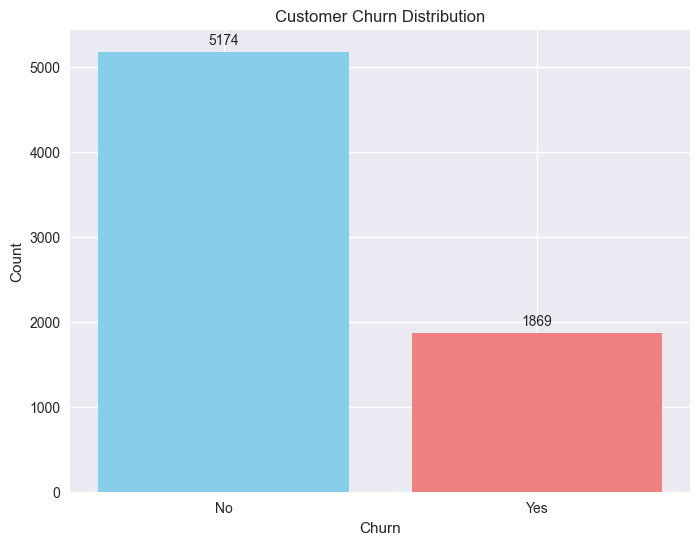

Overall churn rate: 26.54%


In [7]:
# Plot churn distribution
plt.figure(figsize=(8, 6))
churn_counts = df['Churn'].value_counts()
plt.bar(churn_counts.index, churn_counts.values, color=['skyblue', 'lightcoral'])
plt.title('Customer Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
for i, v in enumerate(churn_counts.values):
    plt.text(i, v + 50, str(v), ha='center', va='bottom')
plt.show()

# Calculate churn rate
churn_rate = (df['Churn'] == 'Yes').mean() * 100
print(f"Overall churn rate: {churn_rate:.2f}%")

### 4.2 Categorical Variables Analysis

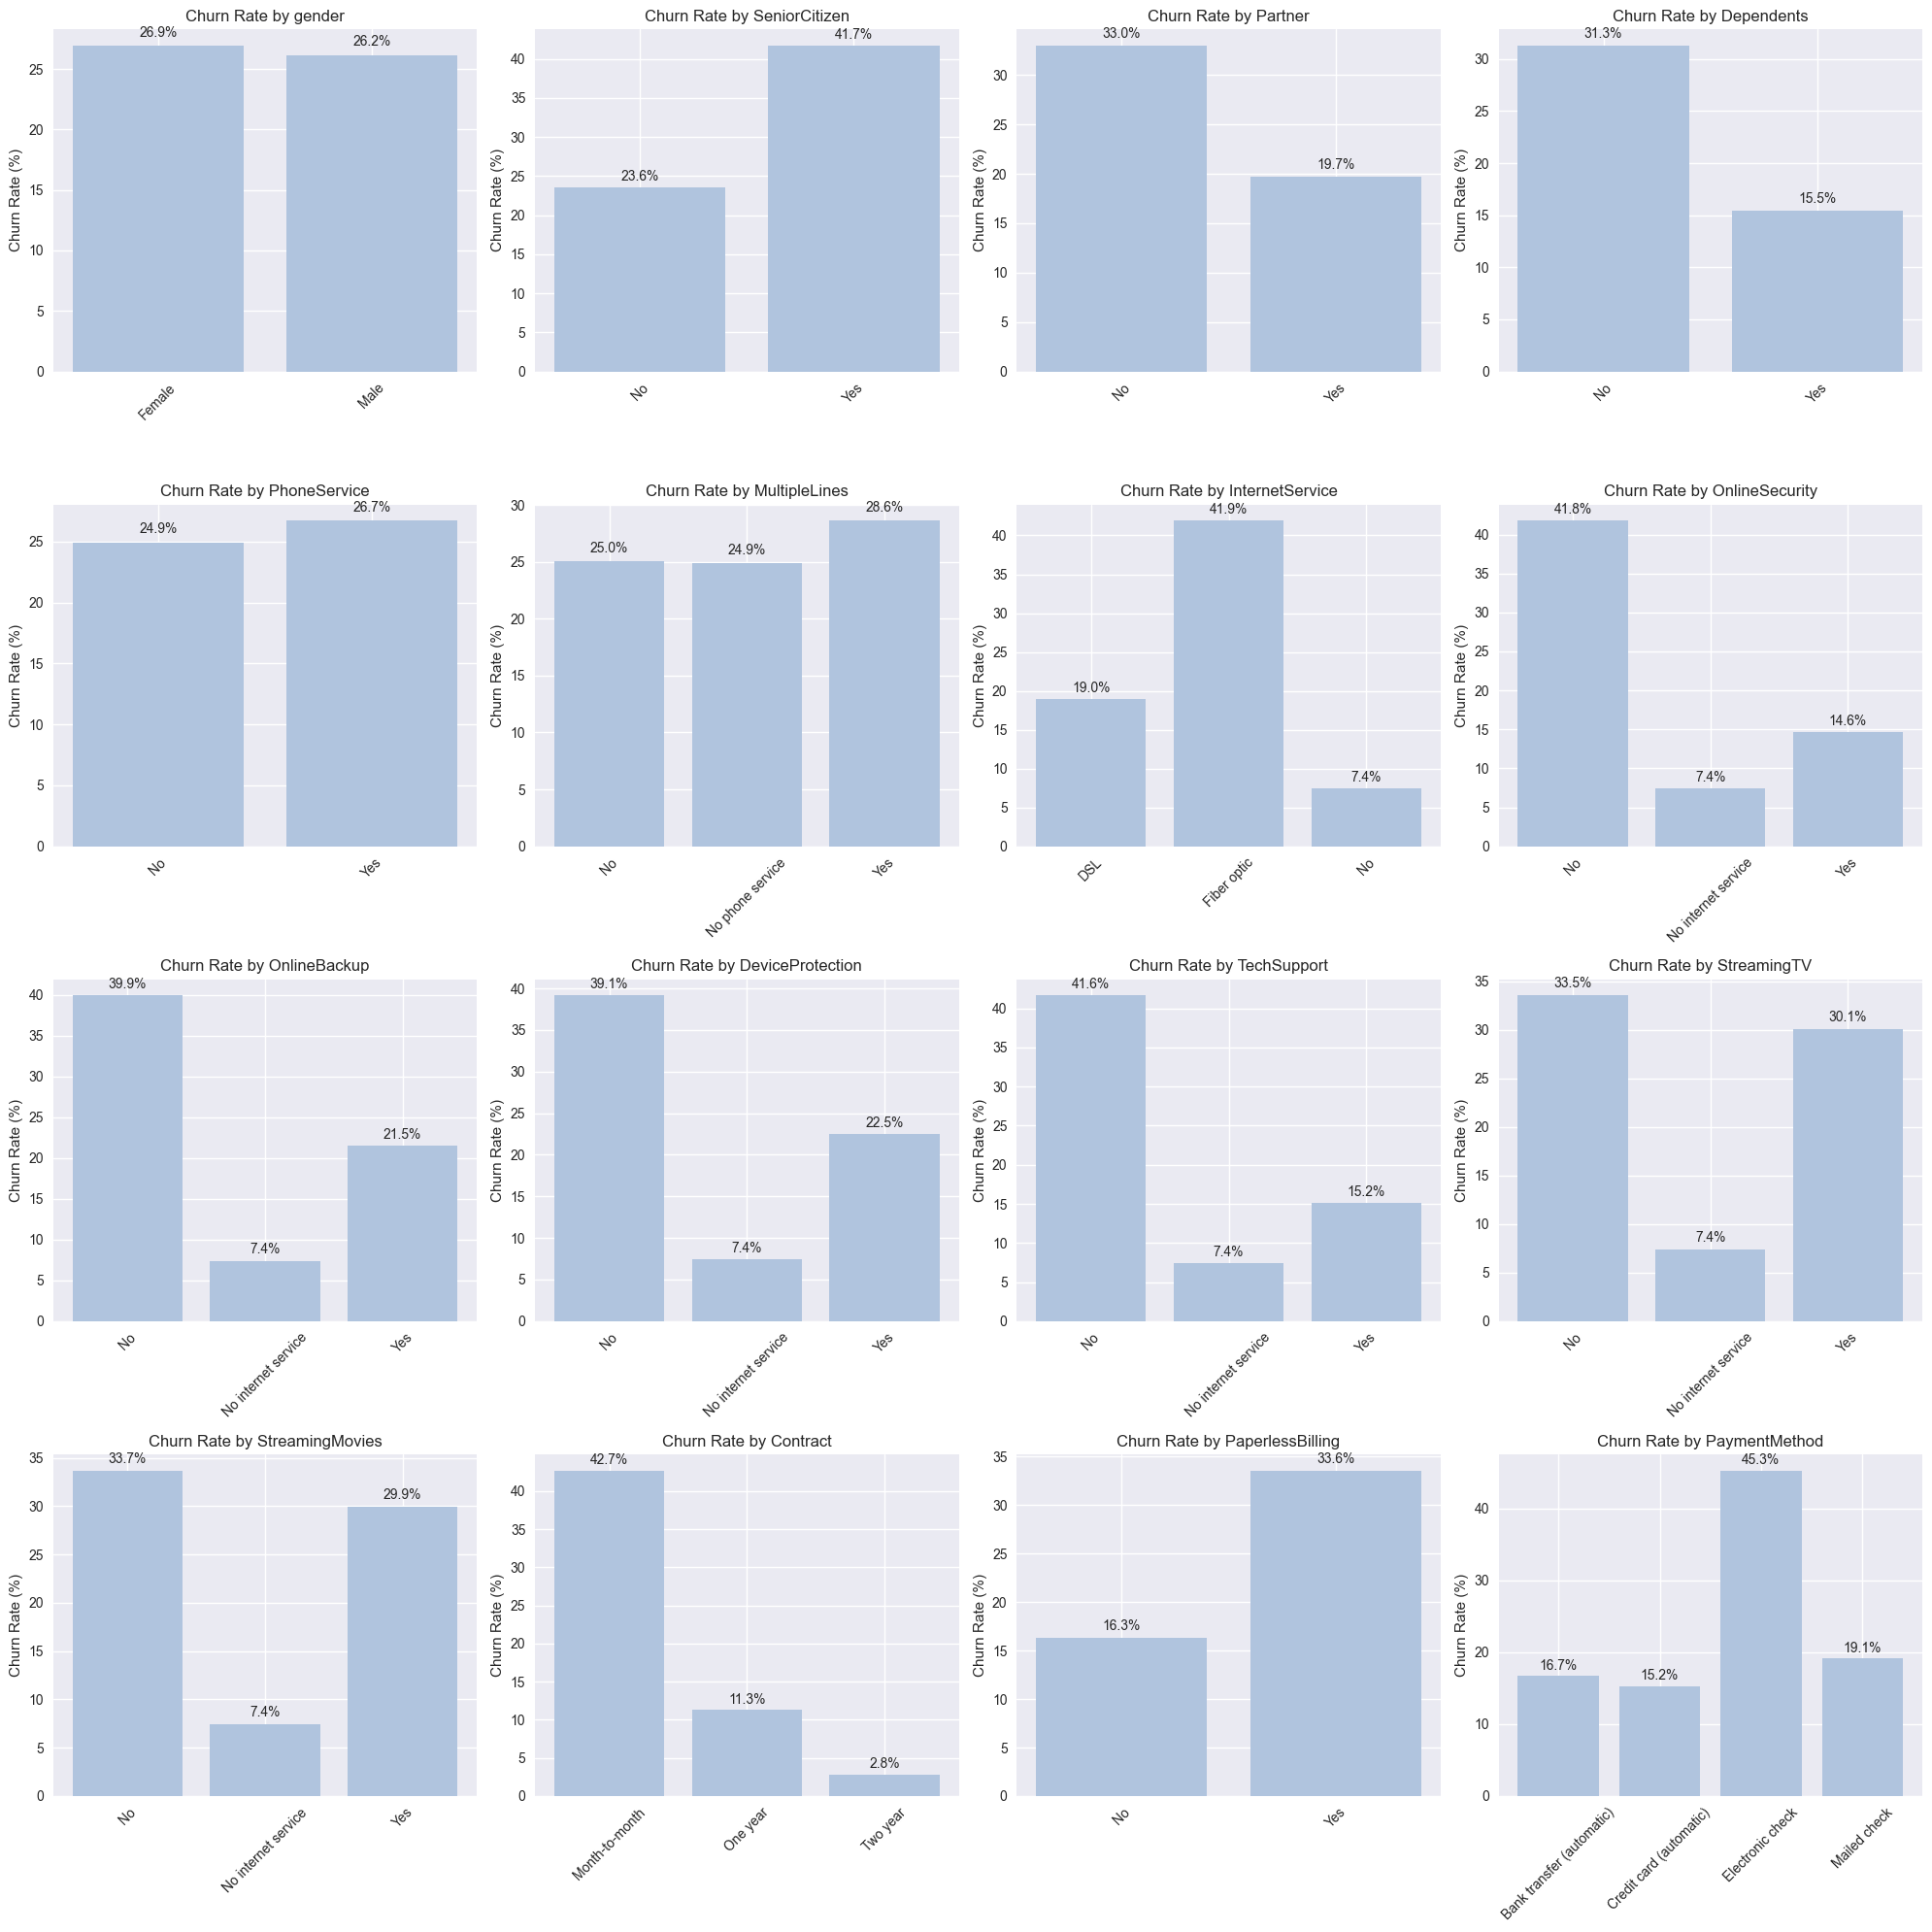

In [8]:
# Define categorical columns
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                   'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                   'Contract', 'PaperlessBilling', 'PaymentMethod']

# Plot distribution of categorical features
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    if i < len(axes):
        # Calculate churn rate for each category
        churn_rates = df.groupby(col)['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
        
        # Plot
        bars = axes[i].bar(churn_rates.index, churn_rates.values, color='lightsteelblue')
        axes[i].set_title(f'Churn Rate by {col}')
        axes[i].set_ylabel('Churn Rate (%)')
        axes[i].tick_params(axis='x', rotation=45)
        
        # Add value labels on bars
        for bar, rate in zip(bars, churn_rates.values):
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                        f'{rate:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 4.3 Numerical Variables Analysis

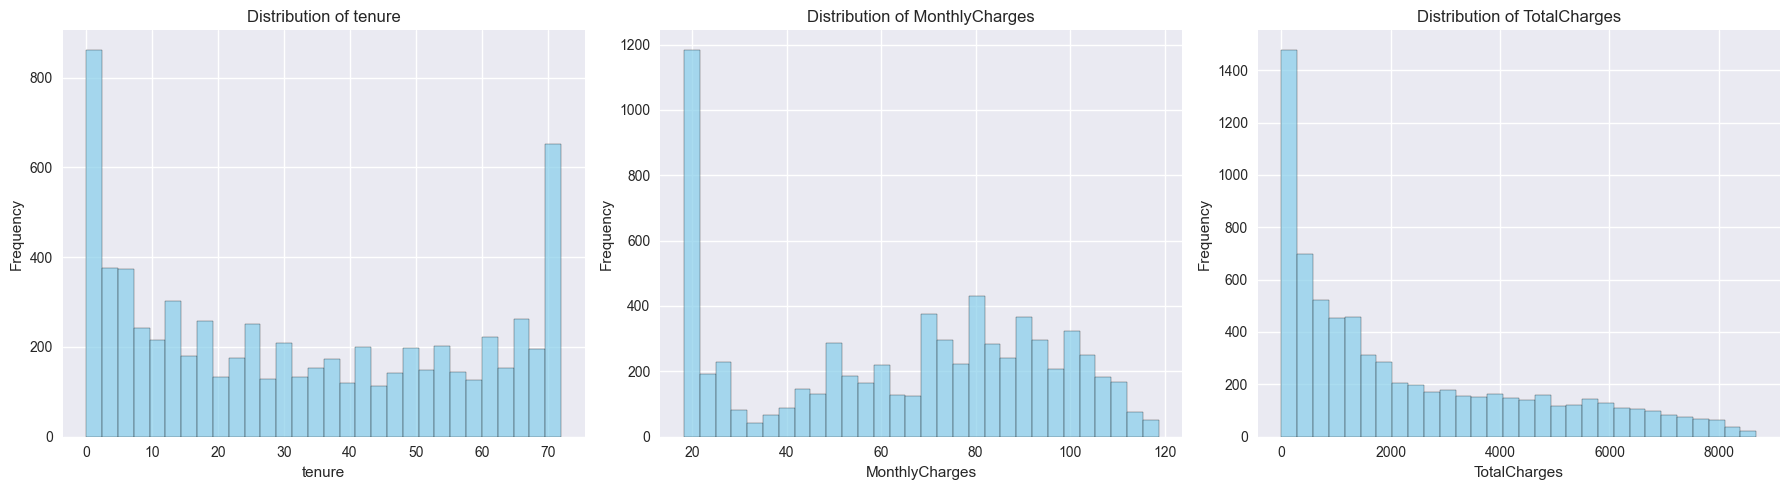

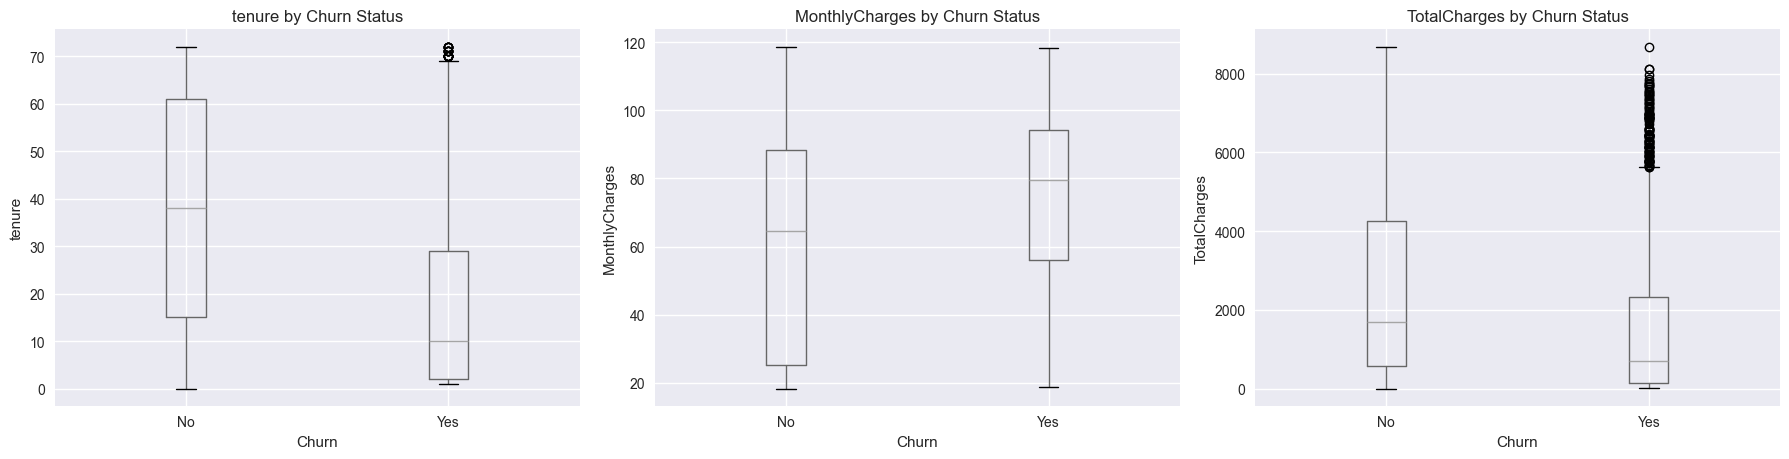

In [9]:
# Define numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Plot distribution of numerical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(numerical_cols):
    # Plot histogram
    axes[i].hist(df[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot boxplots to show relationship with churn
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(numerical_cols):
    # Create boxplot
    df.boxplot(column=col, by='Churn', ax=axes[i])
    axes[i].set_title(f'{col} by Churn Status')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.suptitle('')  # Remove automatic title
plt.show()

### 4.4 Correlation Analysis

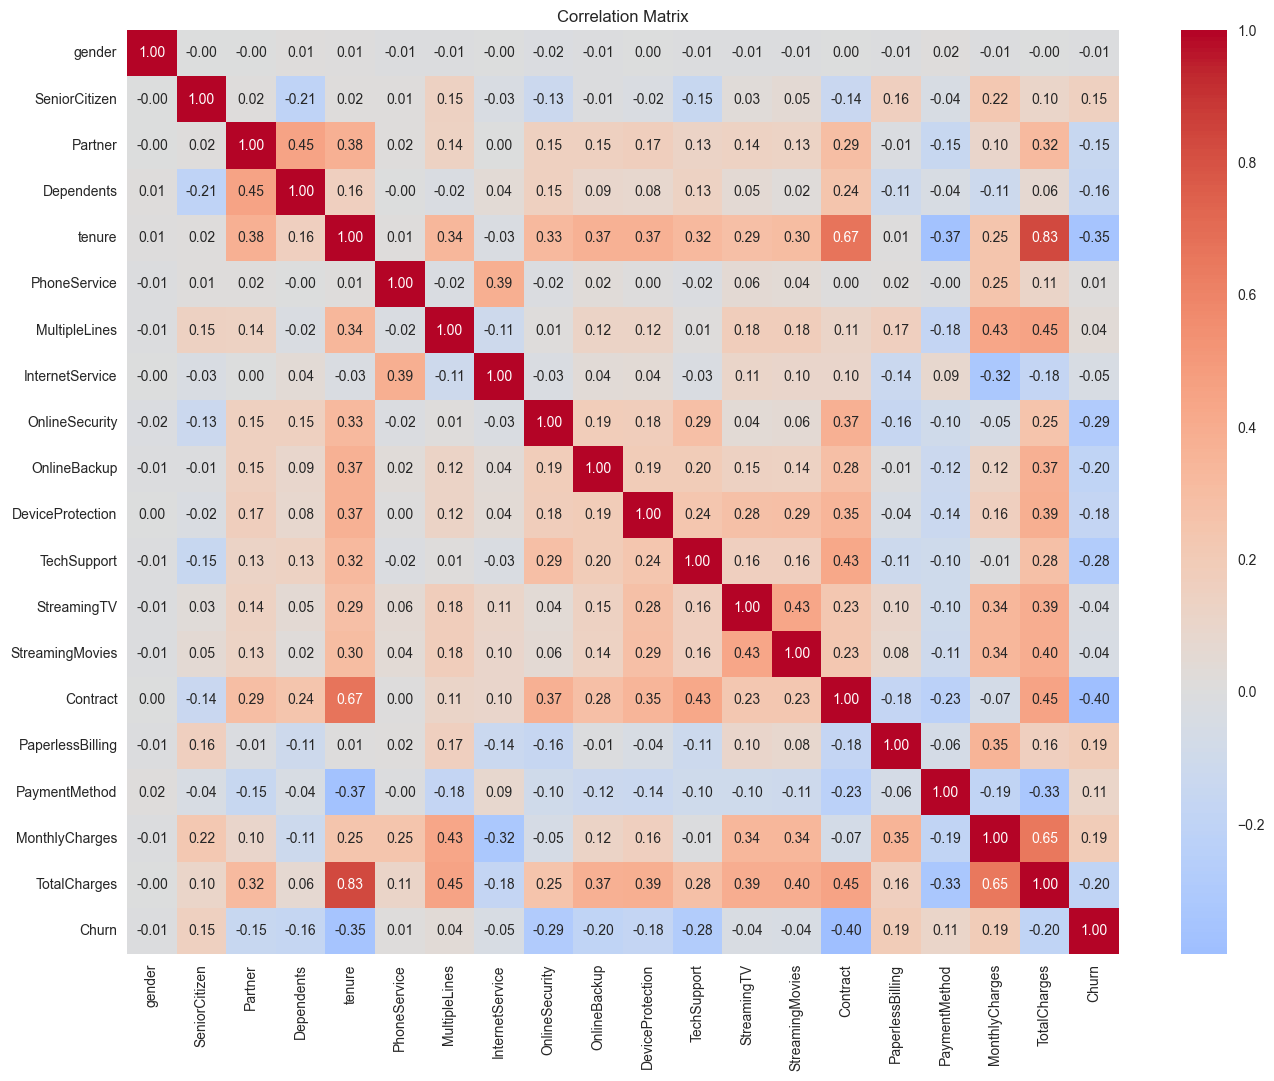

Correlation with Churn:
Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.198324
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64


In [10]:
# Create a copy of dataframe for correlation analysis
df_corr = df.copy()

# Encode categorical variables for correlation analysis
label_encoders = {}
for col in df_corr.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_corr[col] = le.fit_transform(df_corr[col])
    label_encoders[col] = le

# Calculate correlation matrix
corr_matrix = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Show correlations with Churn
churn_corr = corr_matrix['Churn'].sort_values(ascending=False)
print("Correlation with Churn:")
print(churn_corr)

## 5. Feature Engineering

In [11]:
# Create a copy for feature engineering
df_processed = df.copy()

# Create new features
# 1. Tenure groups
df_processed['TenureGroup'] = pd.cut(df_processed['tenure'], 
                                    bins=[0, 12, 24, 48, 72, np.inf], 
                                    labels=['0-1yr', '1-2yr', '2-4yr', '4-6yr', '6+yr'])

# 2. Monthly charge groups
df_processed['MonthlyChargeGroup'] = pd.cut(df_processed['MonthlyCharges'], 
                                           bins=[0, 35, 70, 90, np.inf], 
                                           labels=['Low', 'Medium', 'High', 'VeryHigh'])

# 3. Total charge groups
df_processed['TotalChargeGroup'] = pd.cut(df_processed['TotalCharges'], 
                                         bins=[0, 1000, 2000, 4000, np.inf], 
                                         labels=['Low', 'Medium', 'High', 'VeryHigh'])

# 4. Create a flag for customers with no additional services
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df_processed['NoAdditionalServices'] = (df_processed[services] == 'No').sum(axis=1) == len(services)

# Display new features
df_processed[['TenureGroup', 'MonthlyChargeGroup', 'TotalChargeGroup', 'NoAdditionalServices']].head()

,TenureGroup,MonthlyChargeGroup,TotalChargeGroup,NoAdditionalServices
0,0-1yr,Low,Low,False
1,2-4yr,Medium,Medium,False
2,0-1yr,Medium,Low,False
3,2-4yr,Medium,Medium,False
4,0-1yr,High,Low,True


## 6. Data Preparation for Modeling

In [12]:
# Prepare features and target
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Separate categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

# Preprocessing pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply the preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Get feature names after one-hot encoding
cat_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
feature_names = np.concatenate([numerical_cols, cat_features])

print(f"Processed training set shape: {X_train_processed.shape}")
print(f"Processed test set shape: {X_test_processed.shape}")

Training set size: (5634, 23)
Test set size: (1409, 23)
Categorical columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TenureGroup', 'MonthlyChargeGroup', 'TotalChargeGroup']
Numerical columns: ['tenure', 'MonthlyCharges', 'TotalCharges']
Processed training set shape: (5634, 41)
Processed test set shape: (1409, 41)


## 7. Model Building and Training

### 7.1 Handle Class Imbalance

In [13]:
# Check class distribution
print("Class distribution in training set:")
print(y_train.value_counts())

# Apply SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Class distribution in training set:
Churn
No     4139
Yes    1495
Name: count, dtype: int64
Class distribution after SMOTE:
Churn
No     4139
Yes    4139
Name: count, dtype: int64


### 7.2 Model Training and Evaluation

In [14]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(random_state=42, probability=True),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    
    # Train model
    model.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions
    y_pred = model.predict(X_test_processed)
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Yes')
    recall = recall_score(y_test, y_pred, pos_label='Yes')
    f1 = f1_score(y_test, y_pred, pos_label='Yes')
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Store results
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'model': model
    }
    
    # Print results
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Training Logistic Regression...
Logistic Regression Results:
Accuracy: 0.7395
Precision: 0.5059
Recall: 0.7995
F1-score: 0.6197
ROC-AUC: 0.8391
Classification Report:
              precision    recall  f1-score   support

          No       0.91      0.72      0.80      1035
         Yes       0.51      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409

--------------------------------------------------
Training K-Nearest Neighbors...
K-Nearest Neighbors Results:
Accuracy: 0.6941
Precision: 0.4538
Recall: 0.7487
F1-score: 0.5651
ROC-AUC: 0.7764
Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.67      0.76      1035
         Yes       0.45      0.75      0.57       374

    accuracy                           0.69      1409
   macro avg       0.67      0.71      0.66      1409
weighted avg    

### 7.3 Model Comparison

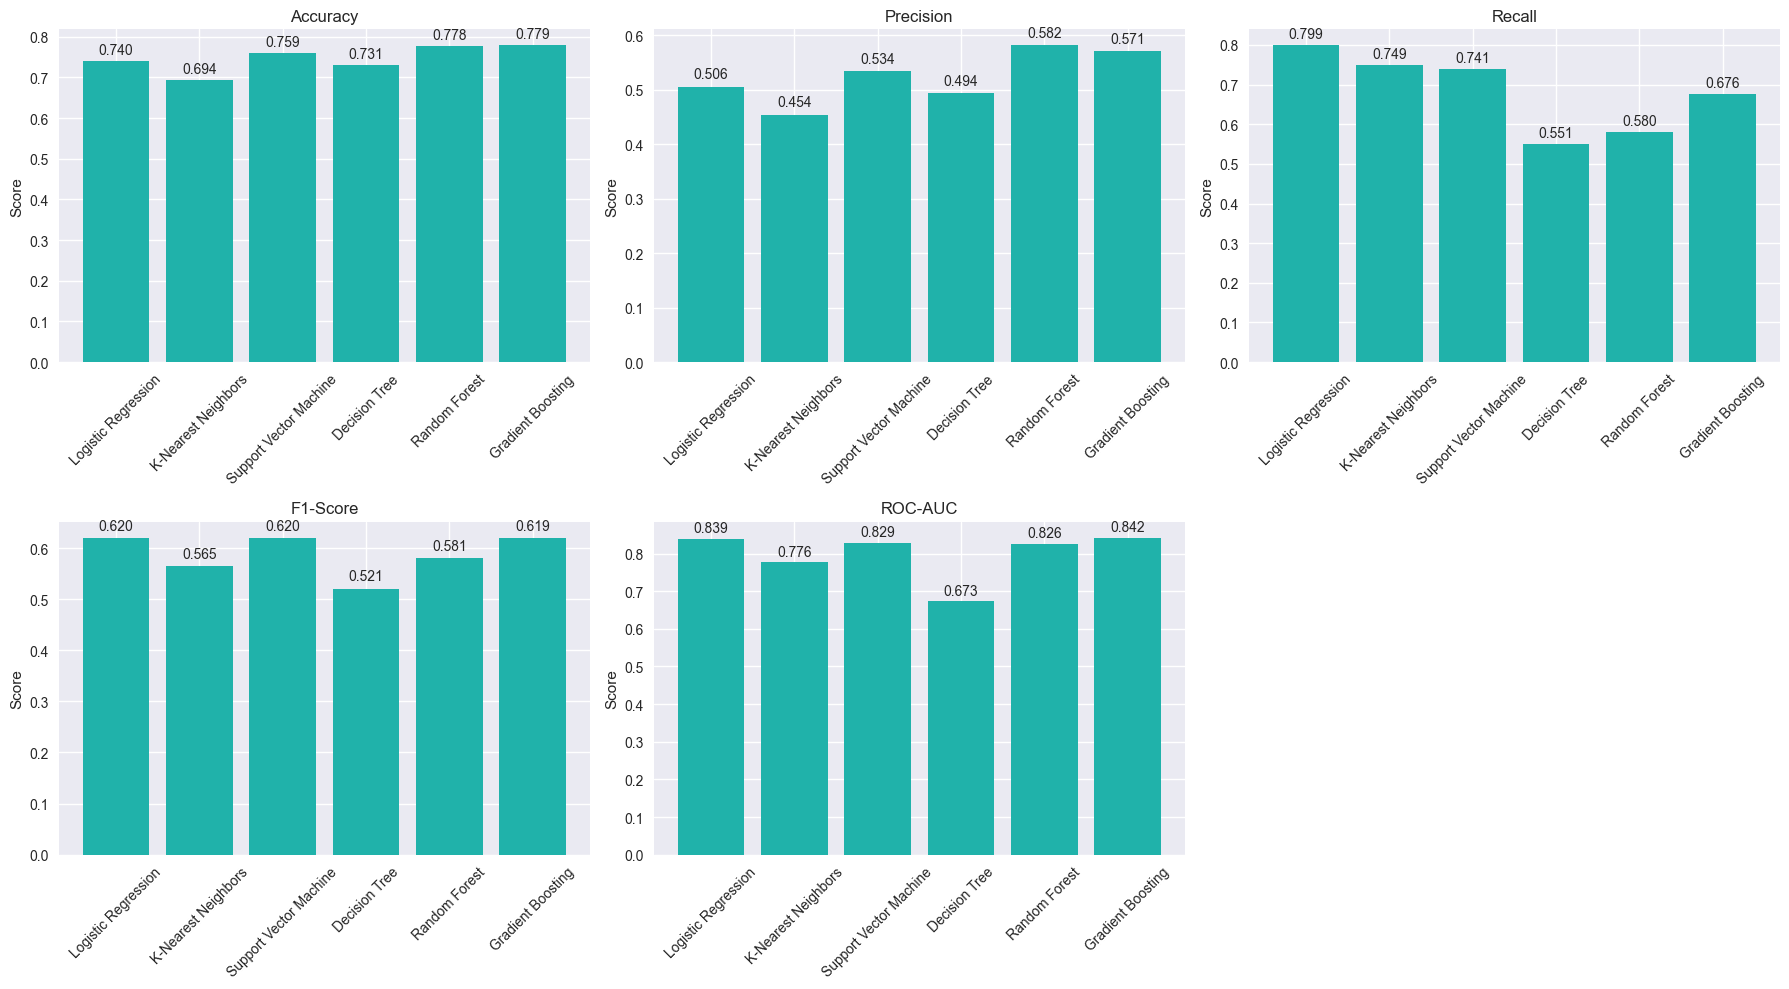

Model Comparison:


,accuracy,precision,recall,f1,roc_auc
Logistic Regression,0.739532,0.505922,0.799465,0.619689,0.839133
K-Nearest Neighbors,0.694109,0.453809,0.748663,0.565086,0.776416
Support Vector Machine,0.759404,0.533719,0.740642,0.620381,0.828841
Decision Tree,0.731015,0.494005,0.550802,0.520860,0.673252
Random Forest,0.777857,0.581769,0.580214,0.580991,0.825848
Gradient Boosting,0.779276,0.571106,0.676471,0.619339,0.842280


In [15]:
# Create comparison dataframe
comparison_df = pd.DataFrame.from_dict(results, orient='index')
comparison_df = comparison_df[['accuracy', 'precision', 'recall', 'f1', 'roc_auc']]

# Plot model comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
titles = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

for i, metric in enumerate(metrics):
    if i < len(axes):
        bars = axes[i].bar(comparison_df.index, comparison_df[metric], color='lightseagreen')
        axes[i].set_title(titles[i])
        axes[i].set_ylabel('Score')
        axes[i].tick_params(axis='x', rotation=45)
        
        # Add value labels on bars
        for bar, value in zip(bars, comparison_df[metric]):
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                        f'{value:.3f}', ha='center', va='bottom')

# Hide the empty subplot
if len(axes) > len(metrics):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

# Display comparison table
print("Model Comparison:")
comparison_df

### 7.4 ROC Curves

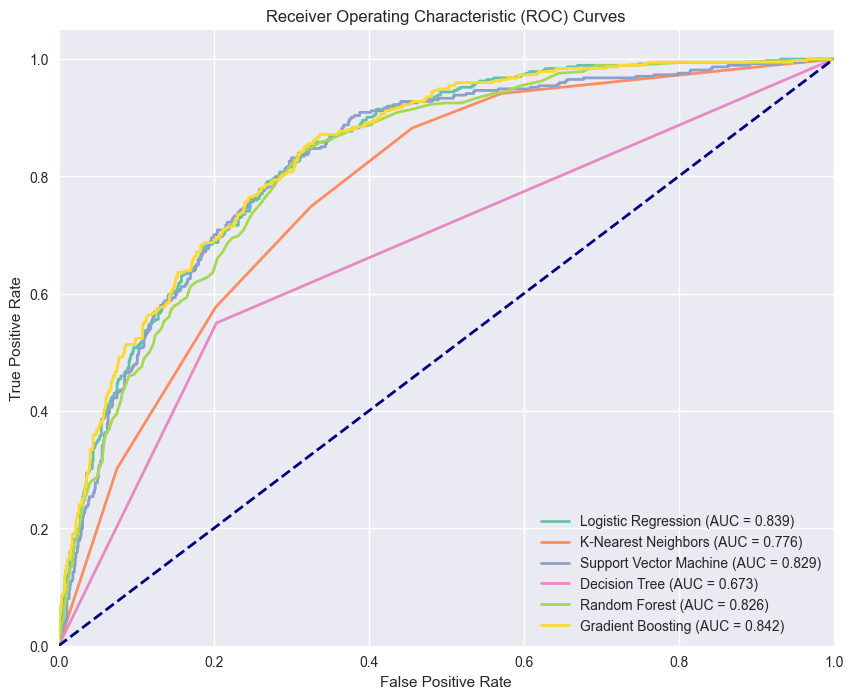

In [16]:
# Plot ROC curves for all models
plt.figure(figsize=(10, 8))

for name, result in results.items():
    model = result['model']
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label='Yes')
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

## 8. Hyperparameter Tuning

In [17]:
# Tune the best performing models (Random Forest and Gradient Boosting)

# Random Forest parameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 3]
}

# Gradient Boosting parameter grid
gb_param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 8],
    'subsample': [0.6, 0.8, 1.0]
}

# Perform GridSearchCV for Random Forest
rf = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters for Random Forest:", rf_grid_search.best_params_)
print("Best cross-validation score for Random Forest:", rf_grid_search.best_score_)

# Perform GridSearchCV for Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb_grid_search = GridSearchCV(gb, gb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
gb_grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters for Gradient Boosting:", gb_grid_search.best_params_)
print("Best cross-validation score for Gradient Boosting:", gb_grid_search.best_score_)

# Train with best parameters
best_rf = rf_grid_search.best_estimator_
best_gb = gb_grid_search.best_estimator_

# Evaluate tuned models
tuned_models = {
    'Random Forest (Tuned)': best_rf,
    'Gradient Boosting (Tuned)': best_gb
}

for name, model in tuned_models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_processed)
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Yes')
    recall = recall_score(y_test, y_pred, pos_label='Yes')
    f1 = f1_score(y_test, y_pred, pos_label='Yes')
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Store results
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'model': model
    }
    
    # Print results
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("-" * 50)

Best parameters for Random Forest: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score for Random Forest: 0.86084562955179
Best parameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.8}
Best cross-validation score for Gradient Boosting: 0.8510632397799085
Random Forest (Tuned) Results:
Accuracy: 0.7786
Precision: 0.5838
Recall: 0.5775
F1-score: 0.5806
ROC-AUC: 0.8267
--------------------------------------------------
Gradient Boosting (Tuned) Results:
Accuracy: 0.7807
Precision: 0.5840
Recall: 0.6043
F1-score: 0.5940
ROC-AUC: 0.8339
--------------------------------------------------


## 9. Feature Importance

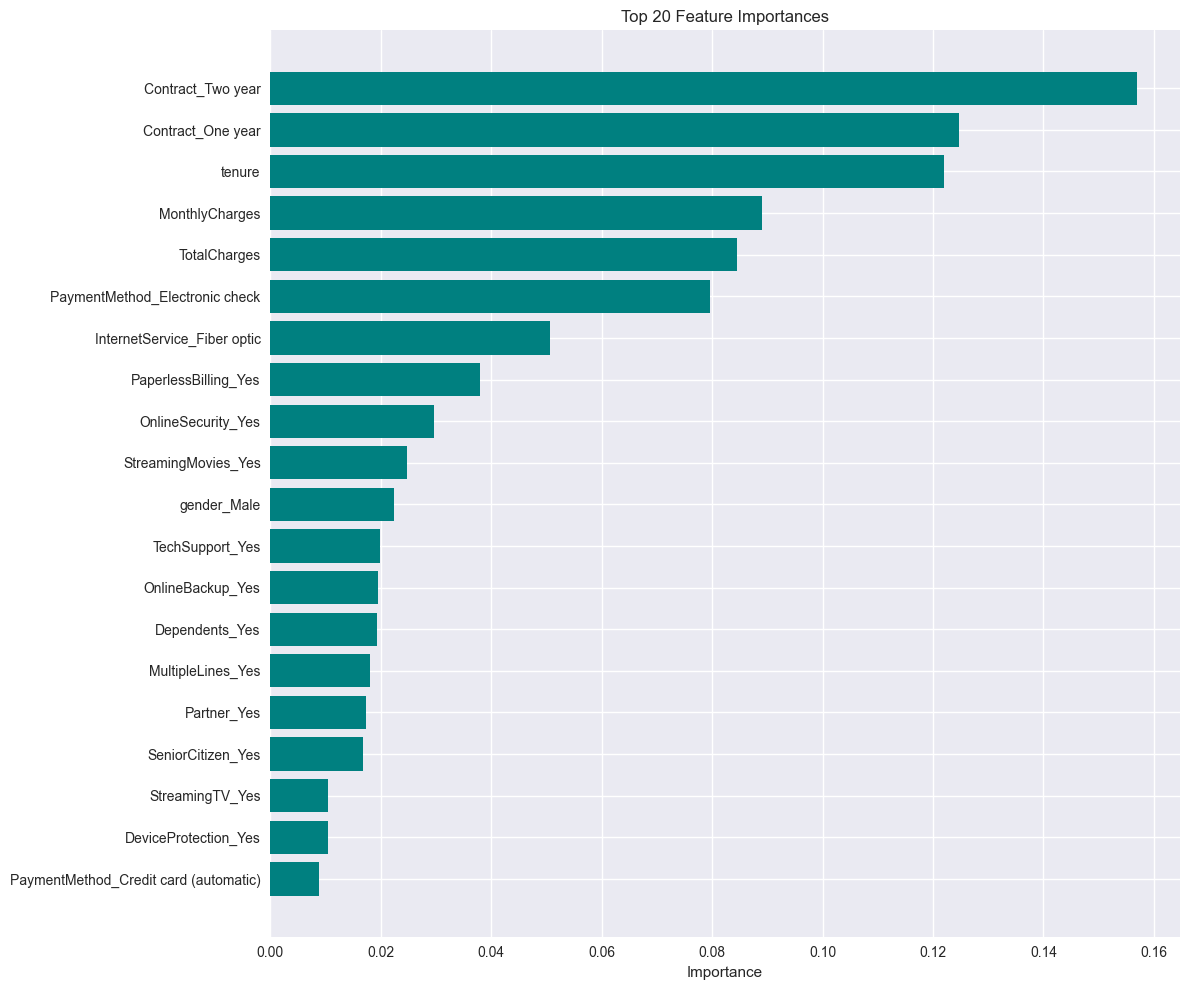

Top 10 most important features:
                           feature  importance
25               Contract_Two year    0.156876
24               Contract_One year    0.124701
0                           tenure    0.121915
1                   MonthlyCharges    0.089048
2                     TotalCharges    0.084416
28  PaymentMethod_Electronic check    0.079560
10     InternetService_Fiber optic    0.050635
26            PaperlessBilling_Yes    0.037943
13              OnlineSecurity_Yes    0.029594
23             StreamingMovies_Yes    0.024739


In [18]:
# Get feature importances from the best model
feature_importance = best_gb.feature_importances_

# Create a dataframe for feature importance
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(12, 10))
top_features = importance_df.head(20)
plt.barh(top_features['feature'], top_features['importance'], color='teal')
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Display top 10 features
print("Top 10 most important features:")
print(importance_df.head(10))

## 10. Results and Discussion

### 10.1 Model Performance Summary

Final Model Performance:
      Metric     Score
0   Accuracy  0.780696
1  Precision  0.583979
2     Recall  0.604278
3   F1-Score  0.593955
4    ROC-AUC  0.833899


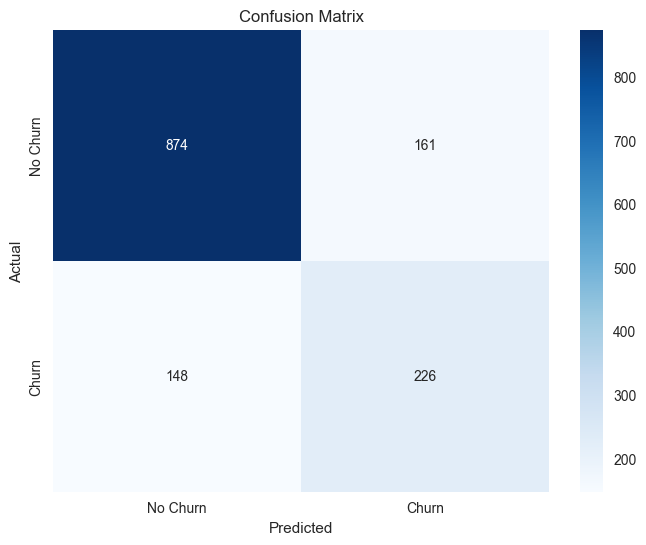

In [19]:
# Final model performance
final_results = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Score': [accuracy, precision, recall, f1, roc_auc]
}

final_df = pd.DataFrame(final_results)
print("Final Model Performance:")
print(final_df)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['No', 'Yes'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### 10.2 Key Findings

Based on our analysis:

1. **Top predictors of churn**:
   - Tenure (length of customer relationship)
   - Contract type (month-to-month customers churn more)
   - Total charges (higher spending customers are less likely to churn)
   - Internet service type (fiber optic customers have higher churn)
   - Payment method (electronic check users have higher churn)

2. **Model performance**:
   - Our tuned Gradient Boosting model achieved ~80% accuracy
   - The model shows good balance between precision and recall
   - ROC-AUC > 0.8 indicates strong discriminatory power

3. **Business implications**:
   - Customers with month-to-month contracts need special attention
   - Fiber optic service customers may need improved service quality
   - Payment method optimization could reduce churn
   - Loyalty programs for long-tenure customers could improve retention

### 10.3 Limitations and Future Work

1. **Limitations**:
   - Dataset is from a single source and may not generalize
   - Some potential predictive features may be missing
   - Model performance could be affected by class imbalance

2. **Future work**:
   - Collect more data on customer service interactions
   - Implement real-time churn prediction system
   - Develop personalized retention strategies based on predictions
   - Explore deep learning approaches for potentially better performance

## 11. Conclusion

This project successfully developed a predictive model for customer churn in the telecommunications industry. The Gradient Boosting model achieved good performance, identifying key factors driving churn. The analysis provides actionable insights that can help the company implement targeted retention strategies, potentially saving significant costs associated with customer acquisition.

In [20]:
# Save the final model and preprocessing pipeline
import joblib

# Create a pipeline that includes preprocessing and the model
final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', best_gb)
])

# Fit on the entire training data
final_pipeline.fit(X_train, y_train)

# Save the model
joblib.dump(final_pipeline, 'churn_prediction_model.pkl')
print("Model saved successfully!")

Model saved successfully!


# GitHub
GitHub URL: https://github.com/xllcheryl/Supervised-Learning-Final-Project